In [1]:
%load_ext autoreload
%autoreload 2

import os
os.chdir("../")

%matplotlib notebook
import matplotlib.pylab as plt
# pylab.rcParams['figure.figsize'] = (10, 5)

In [2]:
from ld_gan import visualize
import numpy as np
import ld_gan
from ld_gan.visualize import gpu 

In [3]:
gpu()

name                           host                           epoch
--------------------------------------------------------------------
xF_11111_mc.py                 hcigpu03                       810.0  
xc_11111_mc.py                 hcigpu04                       7.88  
xf_11010_vggenc_mc.py          hcigpu04                       691.55  
xf_11111_mc_2.py               hcigpu04                       972.35  
--------------------------------------------------------------------


4 projects running


<IPython.core.display.Javascript object>


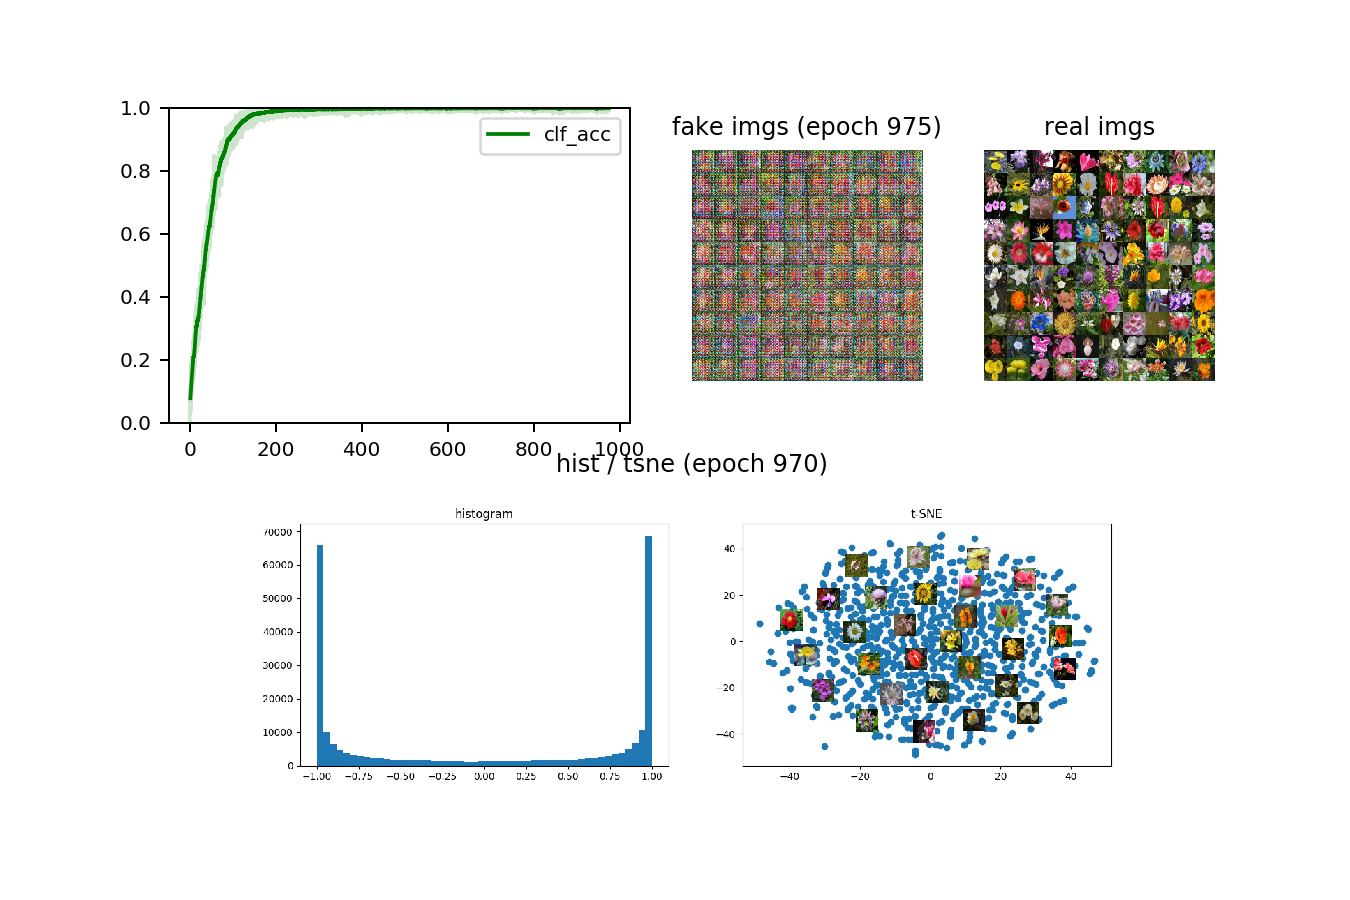

In [5]:
visualize.learning_curve_ia(
                            "xf_11111_mc_2.py", 
                            high_res=True,
                            show_hist_tsne=True,
                            #ymax=10,
                            #mean=True,
                            #logs_fname = "dis_score.txt"
                            logs_fname = "clf_acc.txt"
                            )

<IPython.core.display.Javascript object>


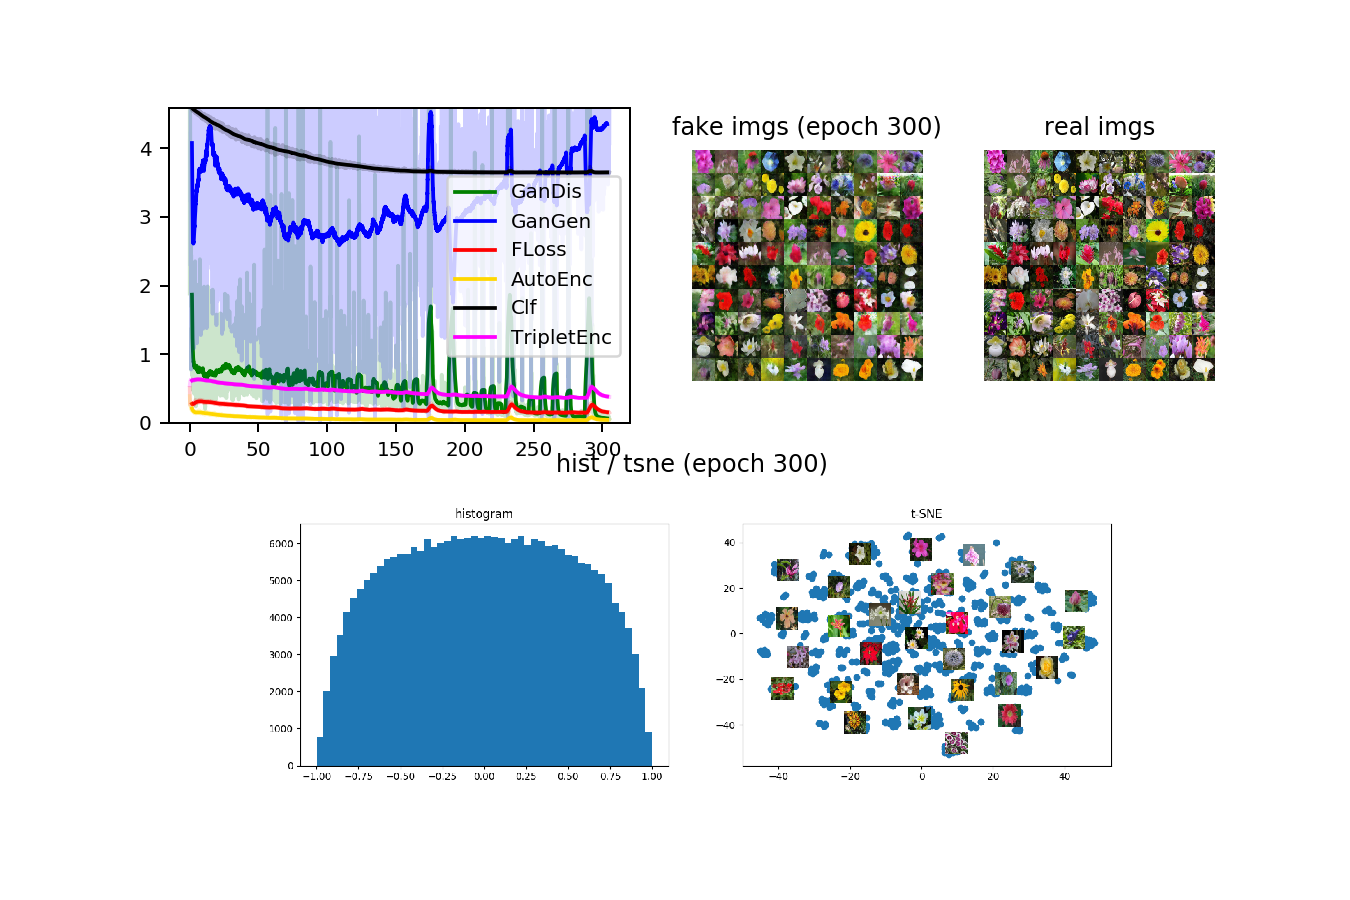

In [77]:
visualize.learning_curve_ia(
                            "xf_111111_loctrip_lr_mc.py", 
                            high_res=True,
                            show_hist_tsne=True,
                            #ymax=0.3, xmax=240,
                            #mean=True,
                            #logs_fname = "dis_score.txt"7
                            #logs_fname = "clf_acc.txt"
                            )

In [97]:
n_neighbors, batch_size = 5, 128

In [116]:
import torch
import torch.nn.functional as F
from torch.autograd import Variable

In [113]:
rand_weights = torch.rand(batch_size, n_neighbors)
rand_weights = rand_weights / rand_weights.sum(dim=1).unsqueeze(1)
batch_z_all = torch.rand(128, 5, 256)
batch_z = rand_weights.unsqueeze(2) * batch_z_all
batch_z = batch_z.sum(dim=1)

In [122]:
rand_weights_np = (Variable(rand_weights).data).cpu().numpy()
batch_z_all_np = (Variable(batch_z_all).data).cpu().numpy()
batch_z_tr = (Variable(batch_z).data).cpu().numpy()

In [123]:
rand_weights_np.shape

(128, 5)

In [124]:
batch_z_all_np.shape

(128, 5, 256)

In [128]:
batch_z_np = []
for idx in range(128):
    z = \
    batch_z_all_np[idx, 0, :] * rand_weights_np[idx, 0] + \
    batch_z_all_np[idx, 1, :] * rand_weights_np[idx, 1] + \
    batch_z_all_np[idx, 2, :] * rand_weights_np[idx, 2] + \
    batch_z_all_np[idx, 3, :] * rand_weights_np[idx, 3] + \
    batch_z_all_np[idx, 4, :] * rand_weights_np[idx, 4]
    
    batch_z_np.append(z)

batch_z_np = np.array(batch_z_np)

In [131]:
np.all(batch_z_tr == batch_z_np)

True